Plot 1:

Graphing divergence only vs the range of potential atmospheric attenuation. Best and worst case.

Initially we will get just spherical divergence.

Then we will use a 

- Temperature range (0 - 35)
- Humidity range 10 - 100
- Frequency discrete values of 500Hz, 1kHz, 2kHz, 5kHz, 10kHz

In [4]:
import numpy as np
import matplotlib.pyplot as plt

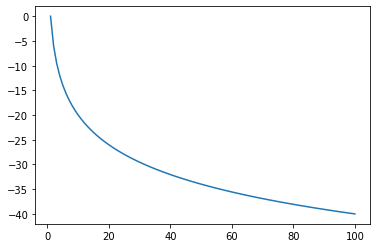

In [76]:
# Just spherical divergence

def attenuation_divergence_at_r(A_0, r):
    """Calculates the attenuation due to divergence at a relative distance vector r from the source"""

    r = np.array(r, dtype=np.float64)

    return A_0 - 20 * np.log10(r)

plt.figure()
A_0 = 0
x = np.linspace(1,100,100)
y = attenuation_divergence_at_r(A_0, x)
plt.plot(x, y)
plt.show()

Plots 2:

The following graphs adds in attenuation due to atmospheric absorption (using max and min values) at frequencies 500Hz, 1kHz, 2kHz, 5kHz

In [77]:
def attenuation(A_0, r, atten):
    """Calculates the attenuation due to divergence at a relative distance vector r from the source"""

    r = np.array(r, dtype=np.float64)

    return A_0 - 20 * np.log10(r) - r * atten

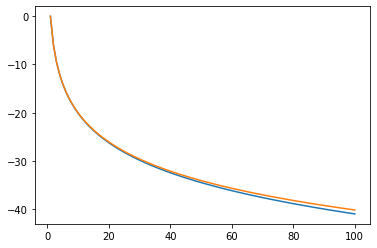

In [78]:
# At 500 Hz,
# Maximum air absorption: 				 0.0096 dB/m
# Occuring at temperature:				 2.5 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0014 dB/m
# Occuring at temperature				 0.0 degrees celsius
# Occuring at humidity:				 99.5 % RH
# Approximate vegetation absorption: 		 0.0794 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB
y1 = attenuation(A_0, x, 0.0096)
y2 = attenuation(A_0, x, 0.0014)

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

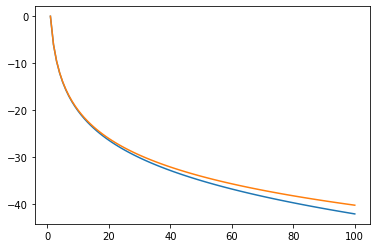

In [79]:
# At 1kHz

# Maximum air absorption: 				 0.0218 dB/m
# Occuring at temperature:				 8.75 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0032 dB/m
# Occuring at temperature				 4.0 degrees celsius
# Occuring at humidity:				 99.5 % RH
# Approximate vegetation absorption: 		 0.1 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB
y1 = attenuation(A_0, x, 0.0218)
y2 = attenuation(A_0, x, 0.0032)

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

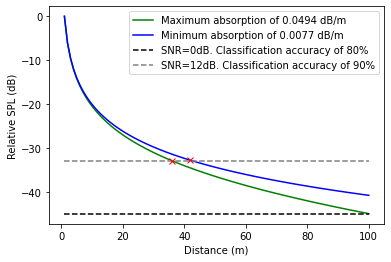

In [123]:
# At 2kHz

# Maximum air absorption: 				 0.0494 dB/m
# Occuring at temperature:				 15.5 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0077 dB/m
# Occuring at temperature				 11.5 degrees celsius
# Occuring at humidity:				 99.5 % RH
# Approximate vegetation absorption: 		 0.126 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB

max_attenuation = 0.0494
min_attenuation = 0.0077

x = np.linspace(1,100,100)

y1 = attenuation(A_0, x, max_attenuation)
y2 = attenuation(A_0, x, min_attenuation)

noise = 40 - 85

y = noise*np.ones_like(x)
f = (noise+12)*np.ones_like(x)

label1 = "Maximum absorption of " + str(max_attenuation) + " dB/m"
label2 = "Minimum absorption of " + str(min_attenuation) + " dB/m"

idx1 = np.argwhere(np.diff(np.sign(y1 - f))).flatten()
idx2 = np.argwhere(np.diff(np.sign(y2 - f))).flatten()
idx3 = np.argwhere(np.diff(np.sign(y1 - y))).flatten()

plt.figure()
plt.plot(x,y1,'g',label=label1)
plt.plot(x,y2,'b',label=label2)
plt.plot(x,y,'--',color='black', label="SNR=0dB. Classification accuracy of 80%")
plt.plot(x,f,'--',color="grey", label="SNR=12dB. Classification accuracy of 90%")
plt.plot(x[idx1], y1[idx1], 'rx')
plt.plot(x[idx2], y2[idx2], 'rx')
plt.plot(x[idx3], y1[idx3], 'rx')
plt.xlabel("Distance (m)")
plt.ylabel("Relative SPL (dB)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


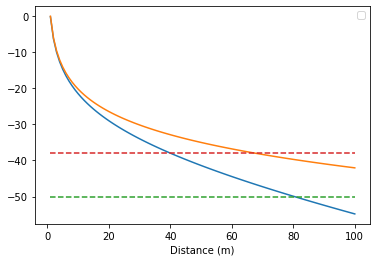

In [89]:
# At 5 kHz

# Maximum air absorption: 				 0.1482 dB/m
# Occuring at temperature:				 25.25 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0205 dB/m
# Occuring at temperature				 0.0 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Approximate vegetation absorption: 		 0.171 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB

y1 = attenuation(A_0, x, 0.1482)
y2 = attenuation(A_0, x, 0.0205)

noise = 35 - 85

y = noise*np.ones_like(x)
f = (noise+12)*np.ones_like(x)

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y,'--')
plt.plot(x,f,'--')
plt.xlabel("Distance (m)")

plt.show()

-51.80250352195873


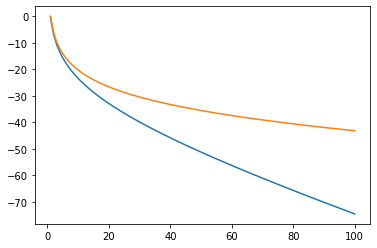

-55.31026437443761


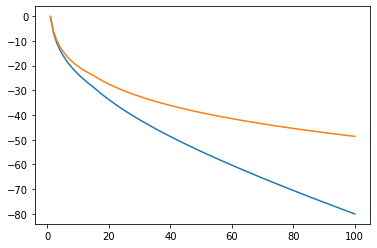

In [90]:
# At 10 kHz

# Maximum air absorption: 				 0.3461 dB/m
# Occuring at temperature:				 33.75 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0322 dB/m
# Occuring at temperature				 0.0 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Approximate vegetation absorption: 		 0.2154 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB

atten1 = 0.3461
atten2 = 0.0322

y1 = attenuation(A_0, x, atten1)
y2 = attenuation(A_0, x, atten2)

print(y1[50])

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

x_h = 0.2
r_h = 0.2

y1 = attenuation_abs_ground(A_0, x, atten1, x_h, r_h)
y2 = attenuation_abs_ground(A_0, x, atten2, x_h, r_h)

print(y1[50])

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [83]:
def ground_effect_dB(x_h,r_h,r):
    """The following is taken from Noise and Vibration Control Engineering page 127. Eq 5.7 could have
    been used. I used equations 5.9 coupled with 5.10. Only really valid for receiver distances less than 200m"""

    h_av = (x_h + r_h) / 2

    G = np.clip(0.75 * (1 - h_av / 12.5), 0, 0.66)

    return np.clip(10 * G * np.log10(r / 15), 0, np.inf)

def ground_effect(x_h, r_h, r):
    
    h_av = (x_h + r_h) / 2
    
    return np.clip(4.8 - h_av / r * (34 + 600 / r), 0, np.inf)

def attenuation_abs_ground(A_0, r, atten,x_h,r_h):
    """Calculates the attenuation due to divergence at a relative distance vector r from the source"""

    r = np.array(r, dtype=np.float64)

    return A_0 - 20 * np.log10(r) - r * atten - ground_effect_dB(x_h,r_h,r)

In [84]:
ground_effect_dB(1,5,50)

2.980408848097925

In [85]:
ground_effect(1,5, 50)

2.04

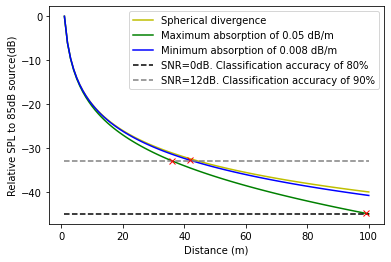

In [157]:
# At 2kHz

# Maximum air absorption: 				 0.0494 dB/m
# Occuring at temperature:				 15.5 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0077 dB/m
# Occuring at temperature				 11.5 degrees celsius
# Occuring at humidity:				 99.5 % RH
# Approximate vegetation absorption: 		 0.126 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB

max_attenuation = 0.05
min_attenuation = 0.008

A_0 = 0
x = np.linspace(1,100,100)
y = attenuation_divergence_at_r(A_0, x)

y1 = attenuation(A_0, x, max_attenuation)
y2 = attenuation(A_0, x, min_attenuation)

noise = 40 - 85

y3 = noise*np.ones_like(x)
f = (noise+12)*np.ones_like(x)

label0 = "Spherical divergence"
label1 = "Maximum absorption of " + str(max_attenuation) + " dB/m"
label2 = "Minimum absorption of " + str(min_attenuation) + " dB/m"

idx1 = np.argwhere(np.diff(np.sign(y1 - f))).flatten()
idx2 = np.argwhere(np.diff(np.sign(y2 - f))).flatten()
idx3 = np.argwhere(np.diff(np.sign(y1 - y3))).flatten()

plt.figure()
plt.plot(x,y,'y',label=label0)
plt.plot(x,y1,'g',label=label1)
plt.plot(x,y2,'b',label=label2)
plt.plot(x,y3,'--',color='black', label="SNR=0dB. Classification accuracy of 80%")
plt.plot(x,f,'--',color="grey", label="SNR=12dB. Classification accuracy of 90%")
plt.plot(x[idx1], y1[idx1], 'rx')
plt.plot(x[idx2], y2[idx2], 'rx')
plt.plot(x[idx3], y1[idx3], 'rx')
plt.xlabel("Distance (m)")
plt.ylabel("Relative SPL to 85dB source(dB)")
plt.legend()
plt.show()

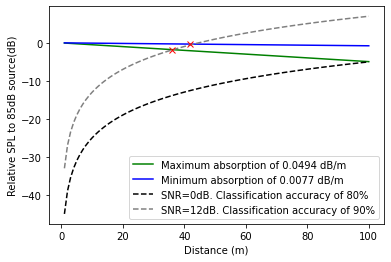

In [137]:
# At 2kHz

# Maximum air absorption: 				 0.0494 dB/m
# Occuring at temperature:				 15.5 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0077 dB/m
# Occuring at temperature				 11.5 degrees celsius
# Occuring at humidity:				 99.5 % RH
# Approximate vegetation absorption: 		 0.126 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB

max_attenuation = 0.0494
min_attenuation = 0.0077

A_0 = 0
x = np.linspace(1,100,100)
y = attenuation_divergence_at_r(A_0, x)

y1 = attenuation(A_0, x, max_attenuation) - y
y2 = attenuation(A_0, x, min_attenuation) - y

noise = 40 - 85

y3 = noise*np.ones_like(x) - y
f = (noise+12)*np.ones_like(x) - y 

label0 = "Spherical divergence"
label1 = "Maximum absorption of " + str(max_attenuation) + " dB/m"
label2 = "Minimum absorption of " + str(min_attenuation) + " dB/m"

idx1 = np.argwhere(np.diff(np.sign(y1 - f))).flatten()
idx2 = np.argwhere(np.diff(np.sign(y2 - f))).flatten()
idx3 = np.argwhere(np.diff(np.sign(y1 - y3))).flatten()

plt.figure()
plt.plot(x,y1,'g',label=label1)
plt.plot(x,y2,'b',label=label2)
plt.plot(x,y3,'--',color='black', label="SNR=0dB. Classification accuracy of 80%")
plt.plot(x,f,'--',color="grey", label="SNR=12dB. Classification accuracy of 90%")
plt.plot(x[idx1], y1[idx1], 'rx')
plt.plot(x[idx2], y2[idx2], 'rx')
plt.plot(x[idx3], y1[idx3], 'rx')
plt.xlabel("Distance (m)")
plt.ylabel("Relative SPL to 85dB source(dB)")
plt.legend()
plt.show()

In [143]:
def ground_attenuation(A_0, x, atten, db_m_height):
    
    x = np.array(x, dtype=np.float64)

    return A_0 - 20 * np.log10(x) - x * atten - db_m_height * x

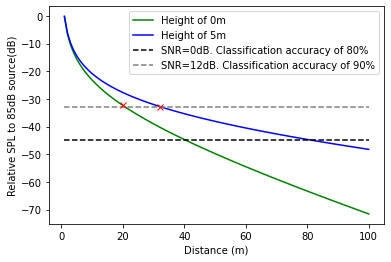

In [156]:
# At 2kHz

# Maximum air absorption: 				 0.0494 dB/m
# Occuring at temperature:				 15.5 degrees celsius
# Occuring at humidity:				 10.0 % RH
# Minimum air absorption: 				 0.0077 dB/m
# Occuring at temperature				 11.5 degrees celsius
# Occuring at humidity:				 99.5 % RH
# Approximate vegetation absorption: 		 0.126 dB/m
# Approximate ground effect at 15m: 		 0.0253 dB
# Approximate ground effect at 30m: 		 1.9932 dB
# Attenuation due to divergence at 10m: 	 20.0 dB
# Attenuation due to divergence at 30m: 	 29.5424 dB
# Attenuation due to divergence at 50m: 	 33.9794 dB

max_attenuation = 0.0494
min_attenuation = 0.0077

A_0 = 0
x = np.linspace(1,100,100)
y = attenuation_divergence_at_r(A_0, x)

# Assume the worst case absorption
# Height = 0m

db_m1 = 0.2665

y1 = ground_attenuation(A_0, x, max_attenuation,db_m1)

# Height 2.5m

db_m2 = 0.033

y2 = ground_attenuation(A_0, x, max_attenuation,db_m2)

# # Height 12.5m

# db_m3 = 6/92 - max_attenuation

# y3 = ground_attenuation(A_0, x, max_attenuation,db_m3)

noise = 40 - 85

y4 = noise*np.ones_like(x)
f = (noise+12)*np.ones_like(x)

label1 = "Height of 0m"
label2 = "Height of 5m"

idx1 = np.argwhere(np.diff(np.sign(y1 - f))).flatten()
idx2 = np.argwhere(np.diff(np.sign(y2 - f))).flatten()

plt.figure()
plt.plot(x,y1,'g',label=label1)
plt.plot(x,y2,'b',label=label2)
plt.plot(x,y4,'--',color='black', label="SNR=0dB. Classification accuracy of 80%")
plt.plot(x,f,'--',color="grey", label="SNR=12dB. Classification accuracy of 90%")
plt.plot(x[idx1], y1[idx1], 'rx')
plt.plot(x[idx2], y2[idx2], 'rx')
plt.xlabel("Distance (m)")
plt.ylabel("Relative SPL to 85dB source(dB)")
plt.legend()
plt.show()

In [ ]:
# Height data 

